In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from prophet import Prophet
import warnings; 
warnings.simplefilter('ignore')

def escrever_csv(dfa, nome):
    dfa.to_csv(nome+'.csv', index=False)

# Ler

- Dados totais

In [2]:
original1 = pd.read_csv("D:\\B&N Dados\\Delta\\Stocks\\Stocks2022\\Stocks_Delta_2022_Limpo.csv")
original2 = pd.read_csv("D:\\B&N Dados\\Delta\\Stocks\\Stocks2023\\Stocks_Delta_2023_Limpo.csv")

original = pd.concat([original1,original2], ignore_index=True)
original["DATA"] = pd.to_datetime(original["DATA"])

In [3]:
original.tail()

,DATA,EAN,DESC_ARTIGO,STORE,STORE_NAME,INTRANSIT,EXPECTED,PRES_STOCK,STOCK,STOCK_1_Dias_Antes,SELLOUT,SELLOUT_1_Dias_Antes
12929551,2023-05-06,5607623011106,VT DIZERES ADEGA MAYOR ALENTEJO 75CL,6089,MDL BEJA RETAIL,0,0,6,5.0,5.0,0.0,0.0
12929552,2023-05-07,5607623011106,VT DIZERES ADEGA MAYOR ALENTEJO 75CL,6089,MDL BEJA RETAIL,0,0,6,5.0,5.0,0.0,0.0
12929553,2023-05-08,5607623011106,VT DIZERES ADEGA MAYOR ALENTEJO 75CL,6089,MDL BEJA RETAIL,0,0,6,5.0,5.0,0.0,0.0
12929554,2023-05-09,5607623011106,VT DIZERES ADEGA MAYOR ALENTEJO 75CL,6089,MDL BEJA RETAIL,0,0,6,5.0,5.0,0.0,0.0
12929555,2023-05-10,5607623011106,VT DIZERES ADEGA MAYOR ALENTEJO 75CL,6089,MDL BEJA RETAIL,0,0,6,NaN,5.0,NaN,0.0


- Produtos e lojas alvo

In [4]:
# Ler ficheiro para dataframe
df_produtos = pd.read_csv('D:\\B&N Dados\\Delta\\Piloto\\produtos.txt', header=None)
df_lojas = pd.read_csv('D:\\B&N Dados\\Delta\\Piloto\\lojas.txt', header=None)

# Passar para uma lista
produtos = df_produtos[0].tolist()
lojas = original["STORE"].unique().tolist()# df_lojas[0].tolist()

# Definir Base de estudo

In [5]:
# Limitar dados para que a base apenas integre os produtos e lojas alvo
df_Juntos = original[original['STORE_NAME'].isin(lojas) & original['DESC_ARTIGO'].isin(produtos)].copy()

# Criar dicionário para receber as bases de cada produto para cada loja
all_dataframes = {}

# Preencher o dicionário com as combinações todas de produtos por loja
for loja in lojas:
    for produto in produtos:
        # Create a new DataFrame for each loja and produto
        df = df_Juntos[(df_Juntos['STORE'] == loja) & (df_Juntos['DESC_ARTIGO'] == produto)]
        
        # Generate a unique name for the DataFrame
        df_name = f'{loja}_{produto}'
        
        # Assign the DataFrame to the unique name
        all_dataframes[df_name] = df




In [15]:
keysList = list(all_dataframes.keys())
keysList

<function dict.values>

# Treino e output

- Definir número de períodos

- Correr modelo

In [6]:
%%time
base_Alterada=[]


for key, df in all_dataframes.items():
    # Perform your desired operations on the dataframe
    # For example, let's add a new column with predictions from a Linear Regression model
    
    # Assuming your features are in columns 'x1' and 'x2', and the target is in column 'y'
    df_Treino = df[["DATA", "SELLOUT"]].rename(columns={"DATA":"ds","SELLOUT":"y"})
    df_Treino = df_Treino[df_Treino["ds"] < "01-01-2023"]
    
    df_Final = df[["DATA", "STORE", "STORE_NAME", "DESC_ARTIGO", "SELLOUT"]]
    
    # Train the machine learning model
    m = Prophet(interval_width=0.95, daily_seasonality=True)
    model = m.fit(df_Treino)
    
    # Make predictions    
    future = m.make_future_dataframe(periods=1000, freq="D")
    forecast = m.predict(future)

    
    # Add the predictions as a new column to the dataframe
    df_Final = pd.merge(df_Final, forecast[["ds", "yhat", "yhat_lower","yhat_upper"]], how="inner", left_on="DATA", right_on="ds")
    
    # Append the modified dataframe to the list
    base_Alterada.append(df_Final)

# Fazer uma base com os dados todos
base_Final = pd.concat(base_Alterada)

12:15:07 - cmdstanpy - INFO - Chain [1] start processing
12:15:07 - cmdstanpy - INFO - Chain [1] done processing
12:15:08 - cmdstanpy - INFO - Chain [1] start processing
12:15:08 - cmdstanpy - INFO - Chain [1] done processing
12:15:09 - cmdstanpy - INFO - Chain [1] start processing
12:15:09 - cmdstanpy - INFO - Chain [1] done processing
12:15:10 - cmdstanpy - INFO - Chain [1] start processing
12:15:10 - cmdstanpy - INFO - Chain [1] done processing
12:15:11 - cmdstanpy - INFO - Chain [1] start processing
12:15:11 - cmdstanpy - INFO - Chain [1] done processing
12:15:11 - cmdstanpy - INFO - Chain [1] start processing
12:15:12 - cmdstanpy - INFO - Chain [1] done processing
12:15:12 - cmdstanpy - INFO - Chain [1] start processing
12:15:13 - cmdstanpy - INFO - Chain [1] done processing
12:15:13 - cmdstanpy - INFO - Chain [1] start processing
12:15:13 - cmdstanpy - INFO - Chain [1] done processing
12:15:14 - cmdstanpy - INFO - Chain [1] start processing
12:15:14 - cmdstanpy - INFO - Chain [1]

12:16:07 - cmdstanpy - INFO - Chain [1] done processing
12:16:08 - cmdstanpy - INFO - Chain [1] start processing
12:16:08 - cmdstanpy - INFO - Chain [1] done processing
12:16:08 - cmdstanpy - INFO - Chain [1] start processing
12:16:08 - cmdstanpy - INFO - Chain [1] done processing
12:16:09 - cmdstanpy - INFO - Chain [1] start processing
12:16:09 - cmdstanpy - INFO - Chain [1] done processing
12:16:09 - cmdstanpy - INFO - Chain [1] start processing
12:16:10 - cmdstanpy - INFO - Chain [1] done processing
12:16:10 - cmdstanpy - INFO - Chain [1] start processing
12:16:10 - cmdstanpy - INFO - Chain [1] done processing
12:16:11 - cmdstanpy - INFO - Chain [1] start processing
12:16:11 - cmdstanpy - INFO - Chain [1] done processing
12:16:12 - cmdstanpy - INFO - Chain [1] start processing
12:16:12 - cmdstanpy - INFO - Chain [1] done processing
12:16:12 - cmdstanpy - INFO - Chain [1] start processing
12:16:13 - cmdstanpy - INFO - Chain [1] done processing
12:16:13 - cmdstanpy - INFO - Chain [1] 

CPU times: total: 1min 38s
Wall time: 1min 21s


# Verificar

In [11]:
base_Final["yhat"] = np.where(base_Final["yhat"]<0, 0, base_Final["yhat"])

<Axes: xlabel='DATA', ylabel='yhat'>

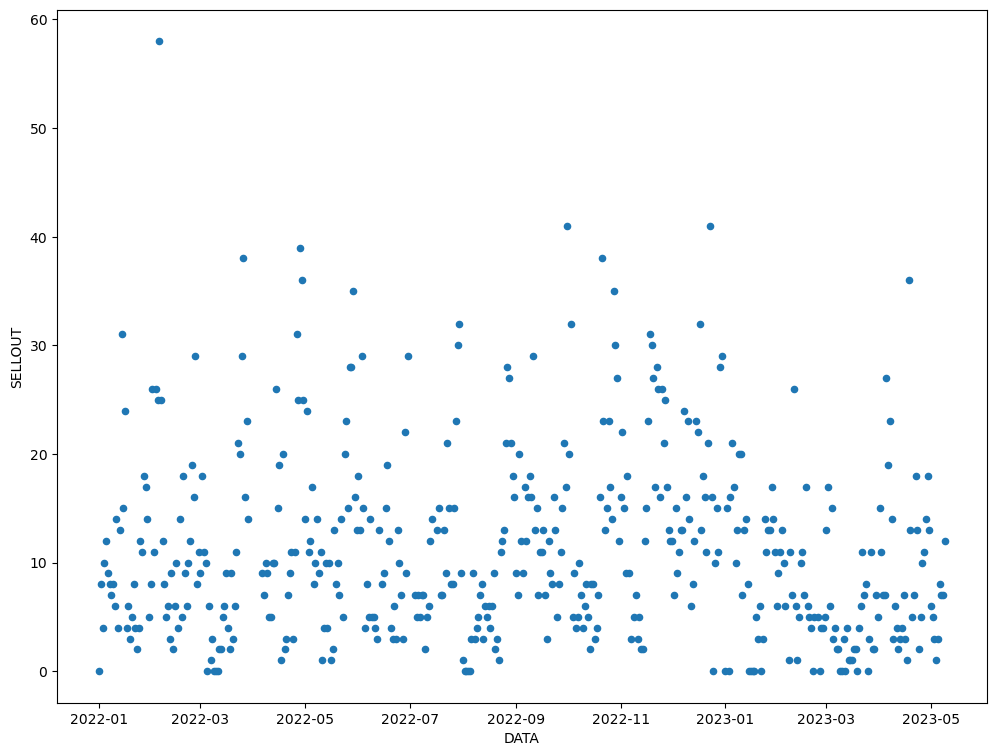

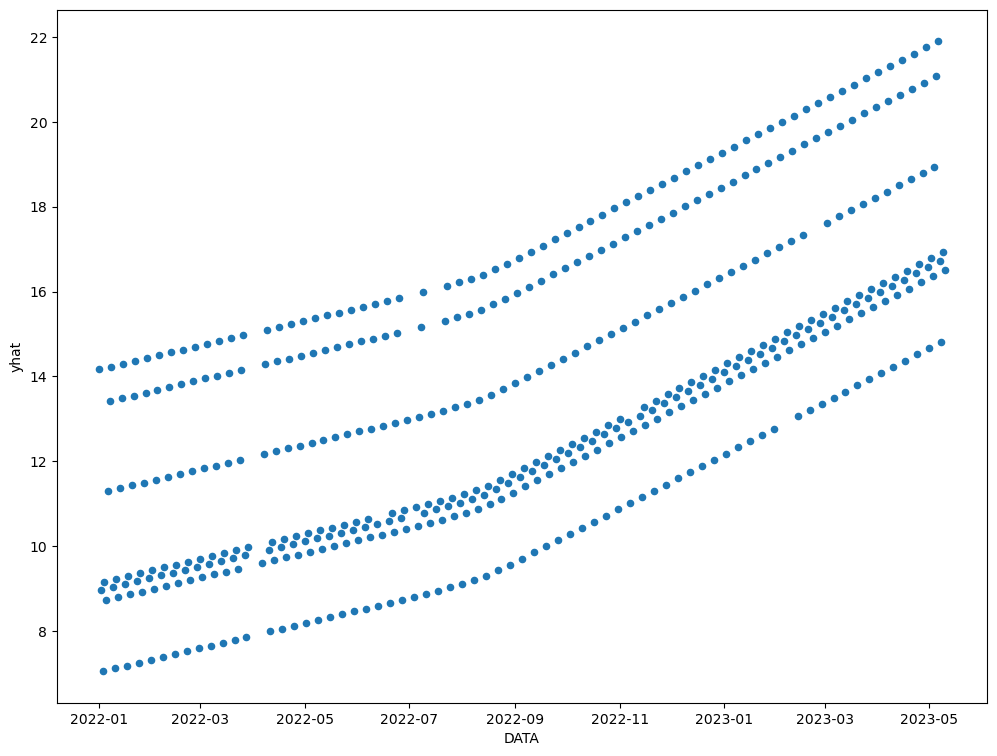

In [12]:
base_Final[(base_Final["DESC_ARTIGO"]==produtos[2]) & (base_Final["STORE_NAME"]==lojas[2])].plot(kind='scatter',figsize=(12, 9), x = 'DATA', y = 'SELLOUT')
base_Final[(base_Final["DESC_ARTIGO"]==produtos[2]) & (base_Final["STORE_NAME"]==lojas[2])].plot(kind='scatter',figsize=(12, 9), x = 'DATA', y = 'yhat')

In [13]:
base_Final["Comparar"] = base_Final["SELLOUT"] - base_Final["yhat"]

<Axes: title={'center': 'Comparar'}, xlabel='DESC_ARTIGO'>

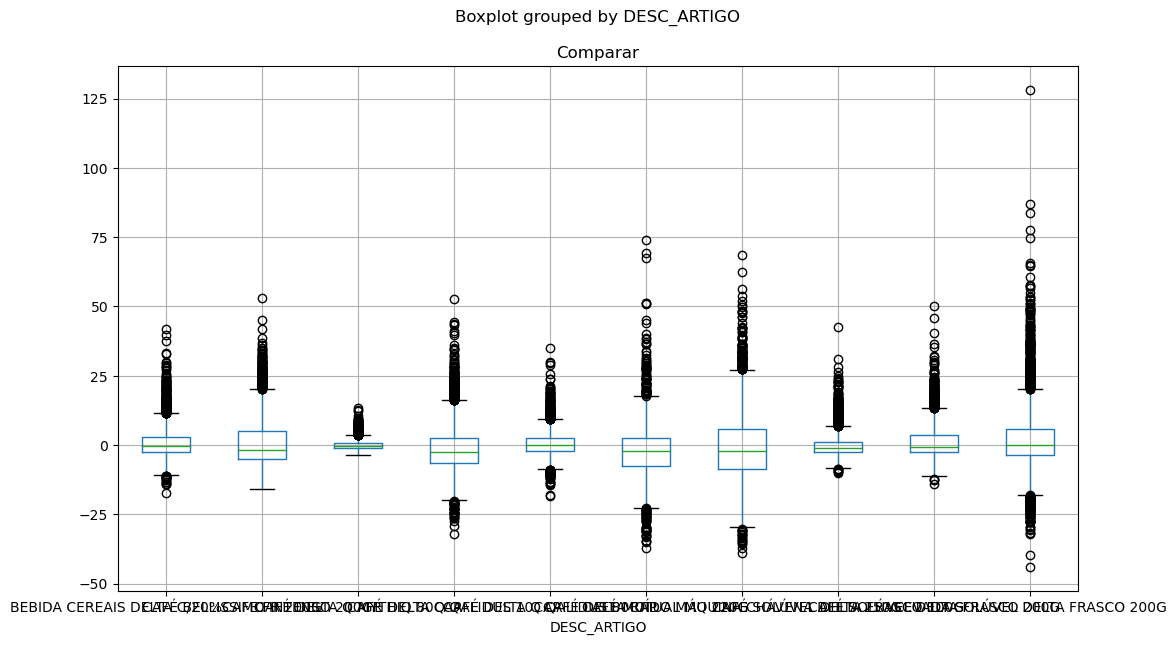

In [14]:
base_Final.boxplot(column='Comparar', by='DESC_ARTIGO', figsize= (12,7))

# Escrever

In [18]:
base_Escrever = base_Final.rename(columns = {"yhat":"Prophet"}).drop(columns = "ds")

In [25]:
base_Escrever.shape

(44772, 6)

In [24]:
escrever_csv(base_Escrever, "Prophet")